## Classification of Weather Data using scikit-learn
In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

**Importing necessary libraries**

In [1]:
import pandas as pd 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

/Users/mspraja/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Create a Pandas DataFrame to read from a CSV file

In [3]:
data = pd.read_csv("daily_weather.csv")
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [8]:
data.drop("number", axis=1, inplace=True)

Text(0.5, 0, 'temp')

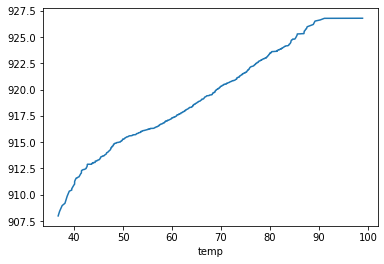

In [12]:
from matplotlib import pyplot as plt

plt.plot(data['air_temp_9am'].sort_values(), data['air_pressure_9am'].sort_values())
plt.xlabel("temp")

## Daily Weather Data Description


The file **daily_weather.csv** is a comma-separated file that contains weather data. This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.


In [119]:
# Let's look at the columns in the dataset 
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


### Data Cleaning 

We have to look for any null values and get rid of those values to make a clean data set

In [13]:
data.isnull().any().any()

True

This means that there are sum null values. Let's have a look at the columns which have null values. 

In [14]:
data.isnull().sum() 

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [18]:
# Print the rows with missing values 
data[data.isnull().any(axis = 1)]

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


#### Data Cleaning Steps 

In [22]:
data

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


Next, we drop out the rows with null values

In [23]:
before_rows = data.shape[0]
data = data.dropna()
after_rows = data.shape[0]

In [24]:
print("The number of dropped rows are {}".format(before_rows - after_rows))

The number of dropped rows are 31


In [28]:
data[data['relative_humidity_3pm']>25]

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.06,74.822,271.1,2.080354,295.4,2.863283,0.00,0.0,42.42,36.16
4,921.16,44.294,277.8,1.856660,136.5,2.863283,8.90,14730.0,92.41,76.74
5,915.30,78.404,182.8,9.932014,189.0,10.983375,0.02,170.0,35.13,33.93
7,918.07,51.710,242.4,2.527742,271.6,3.646212,0.00,0.0,80.47,74.92
9,915.01,47.498,163.1,4.943637,195.9,6.576604,0.00,0.0,88.60,68.05
...,...,...,...,...,...,...,...,...,...,...
1089,915.00,55.040,191.8,5.368656,220.9,7.068730,0.00,0.0,73.55,69.67
1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.00,0.0,26.02,38.18
1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.00,0.0,90.35,73.34
1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.00,0.0,45.59,52.31


## Convert to a Classification task

**Binarize the relative humidity_3pm to 0 or 1**

We are assigning the values 0 or 1 and adding a new column 'high humidity label'. We are basically classifying the data into two categories ( binary problem ) by setting a desired value ( 24.99 , in this case ) to be the threshold and anything above is high ( 1 ) and anything below is low ( 0 ). 

In [29]:
clean_data = data.copy() # New data frame to avoid confusion 
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99) * 1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


<Axes: xlabel='high_humidity_label'>

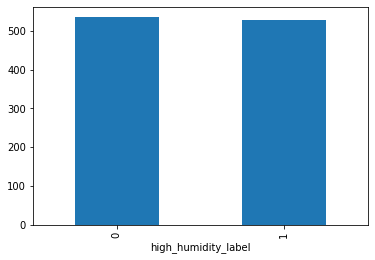

In [33]:
clean_data.high_humidity_label.value_counts().plot(kind="bar")


Target is now stored as y. Here, target is the label - 'high_humidity_label'

In [41]:
y = clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [35]:
clean_data[['high_humidity_label']]

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


In [34]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [36]:
data

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


### Use 9am Sensor signals to predict Humidity at 3PM

In [37]:
time = '9am'
features = list(clean_data.columns[clean_data.columns.str.contains(time)])

# we do not need relative humidity at 9am 
features.remove('relative_humidity_9am')

features

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am']

In [38]:
# Make the data of these features as X
X = clean_data[features].copy()


In [39]:
X

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0
...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0


## Perform the test and Train split

### REMINDER: Training Phase

* In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.


* In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

Let us look at these sets using the following commands below. 

In [163]:
# type(X_train)
# type(X_test)
# type(y_train)
# type(y_test)
# X_train.head()
# #y_train.describe()

In [45]:
y_train.columns

Index(['high_humidity_label'], dtype='object')

In [46]:
y_train.describe()


,high_humidity_label
count,851.000000
mean,0.494712
std,0.500266
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [47]:
X_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,918.905764,64.928740,141.568056,5.461774,147.544243,6.966206,0.195244,257.859463
std,3.171759,11.251248,69.481949,4.564164,67.020742,5.622366,1.665337,1474.402146
min,908.420000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000
25%,916.590752,57.113314,65.145158,2.236940,75.612168,3.031054,0.000000,0.000000
50%,918.900000,65.667482,166.212920,3.869906,175.300000,4.898899,0.000000,0.000000
75%,921.239305,73.697000,190.100000,7.079915,201.000000,8.634588,0.000000,0.000000
max,929.320000,98.906000,343.400000,23.554978,295.400000,29.840780,24.020000,15849.000000


### Fit the model on the training set

We will build a model using the Decision Tree Classifier using the fit functions. 

In [109]:
###grid_search

humidity_classifier = DecisionTreeClassifier(criterion="log_loss",max_leaf_nodes = 100, random_state = 0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=100, random_state=0)

In [110]:
humidity_classifier


DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=100, random_state=0)

### Test the model on thetesting set



In [111]:
predictions = humidity_classifier.predict(X_test)
type(predictions)

numpy.ndarray

In [112]:
predictions
#predictions[:len(predictions)]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [113]:
y_test[['high_humidity_label']][:10]


,high_humidity_label
331,0
866,0
279,0
452,0
994,1
14,0
418,1
881,1
13,1
304,0


So, we have the actual values in the y_test result and the predicted values in the predictions set and now we can compare all the predictions with the actual results to see if we were correct or not. Let's find out the accuracy using accuracy_score.

### Measure the accuracy of the data

In [114]:
accuracy_score(y_test, y_pred = predictions)

0.7793427230046949

In [88]:
y_test.iloc[0]

high_humidity_label    0
Name: 331, dtype: int64

In [90]:
predictions[0]

0

### Measuring the mean squared error

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred = predictions)

0.18779342723004694

We have predictd the humidity at 3PM based on the 9AM measurements with an 81% accuracy and 19% loss which are very good stats. Hence, it's a success. 